## Data Exploration questions:
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Are shared interests more important than a shared racial background?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tinder = pd.read_csv('Speed_Dating_Data.csv', encoding='ISO-8859-1')

# Presentation of the data

Mean age female: 26.105850934692885
Mean age males: 26.609269932756966


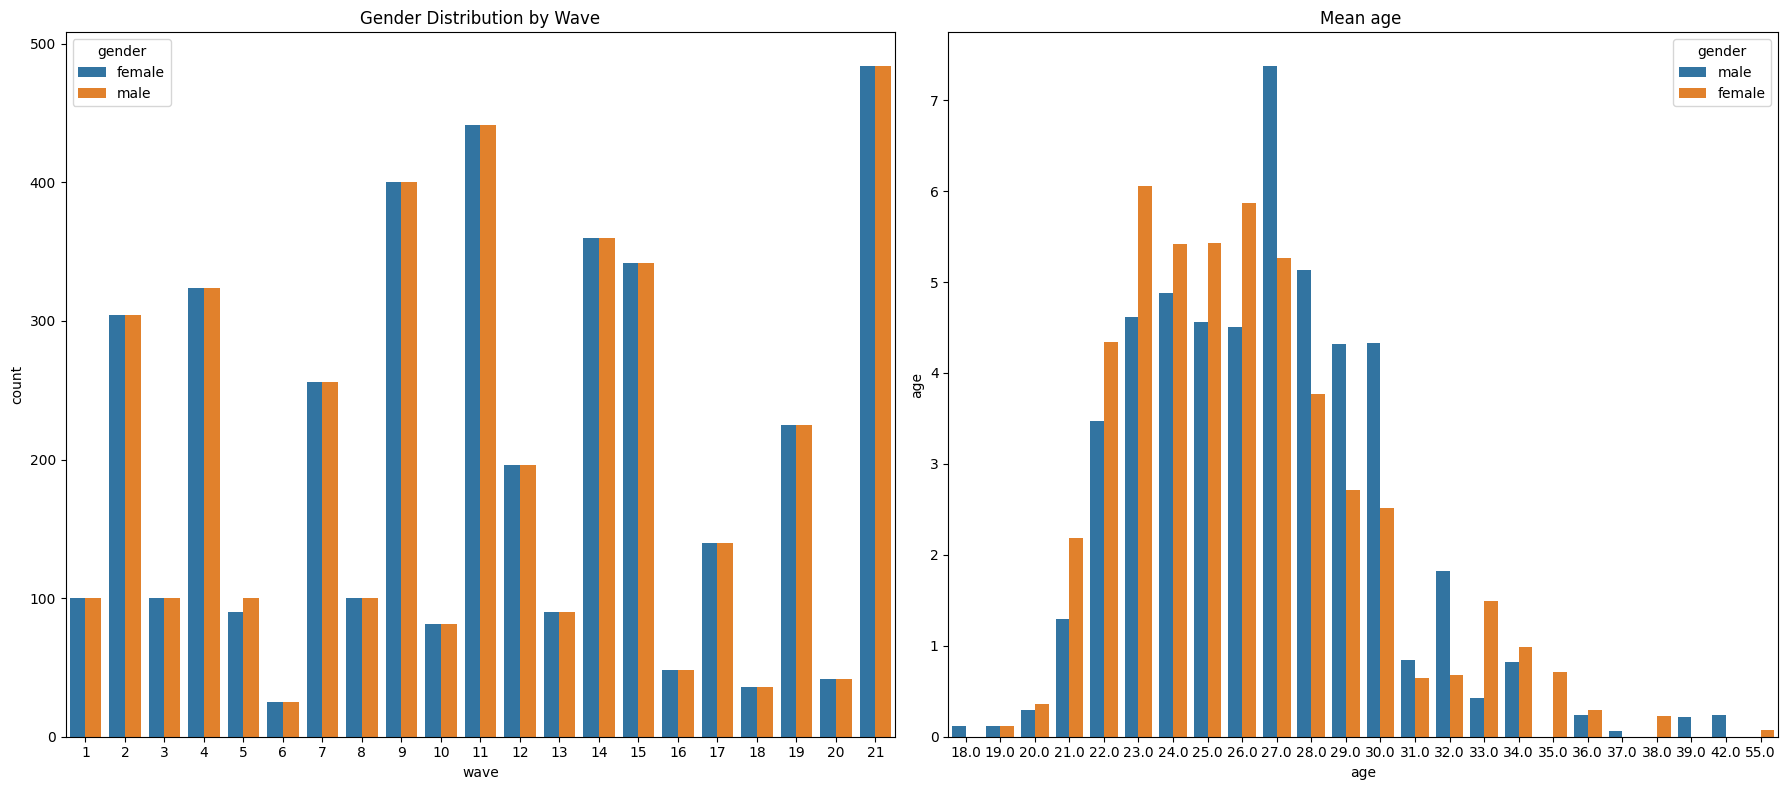

In [25]:
# Replace gender values 0 and 1 with 'female' and 'male'
tinder['gender'] = tinder['gender'].replace({0: 'female', 1: 'male'})

# Group by 'wave' and 'gender' to count occurrences
grouped = tinder.groupby("wave")["gender"].value_counts().reset_index(name="count")

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting gender distribution by wave
sns.countplot(data=tinder, x='wave', hue='gender', ax=axes[0])
axes[0].set_title("Gender Distribution by Wave")

# Plotting mean age according to age
sns.barplot(data=tinder, x="age", y="age", hue='gender', estimator=lambda x: len(x) / len(tinder) * 100, ax=axes[1])
axes[1].set_title("Mean age ")
print("Mean age female:", tinder[tinder['gender']=='female']["age"].mean())
print("Mean age males:", tinder[tinder['gender']=='male']["age"].mean())

# Adjust layout
plt.tight_layout()
plt.savefig("gender and age distribution.png", dpi=300)
plt.show()

- There'is a total of 21 waves where people met between them
- The mean age of the participants is 27 for male and 26 for women

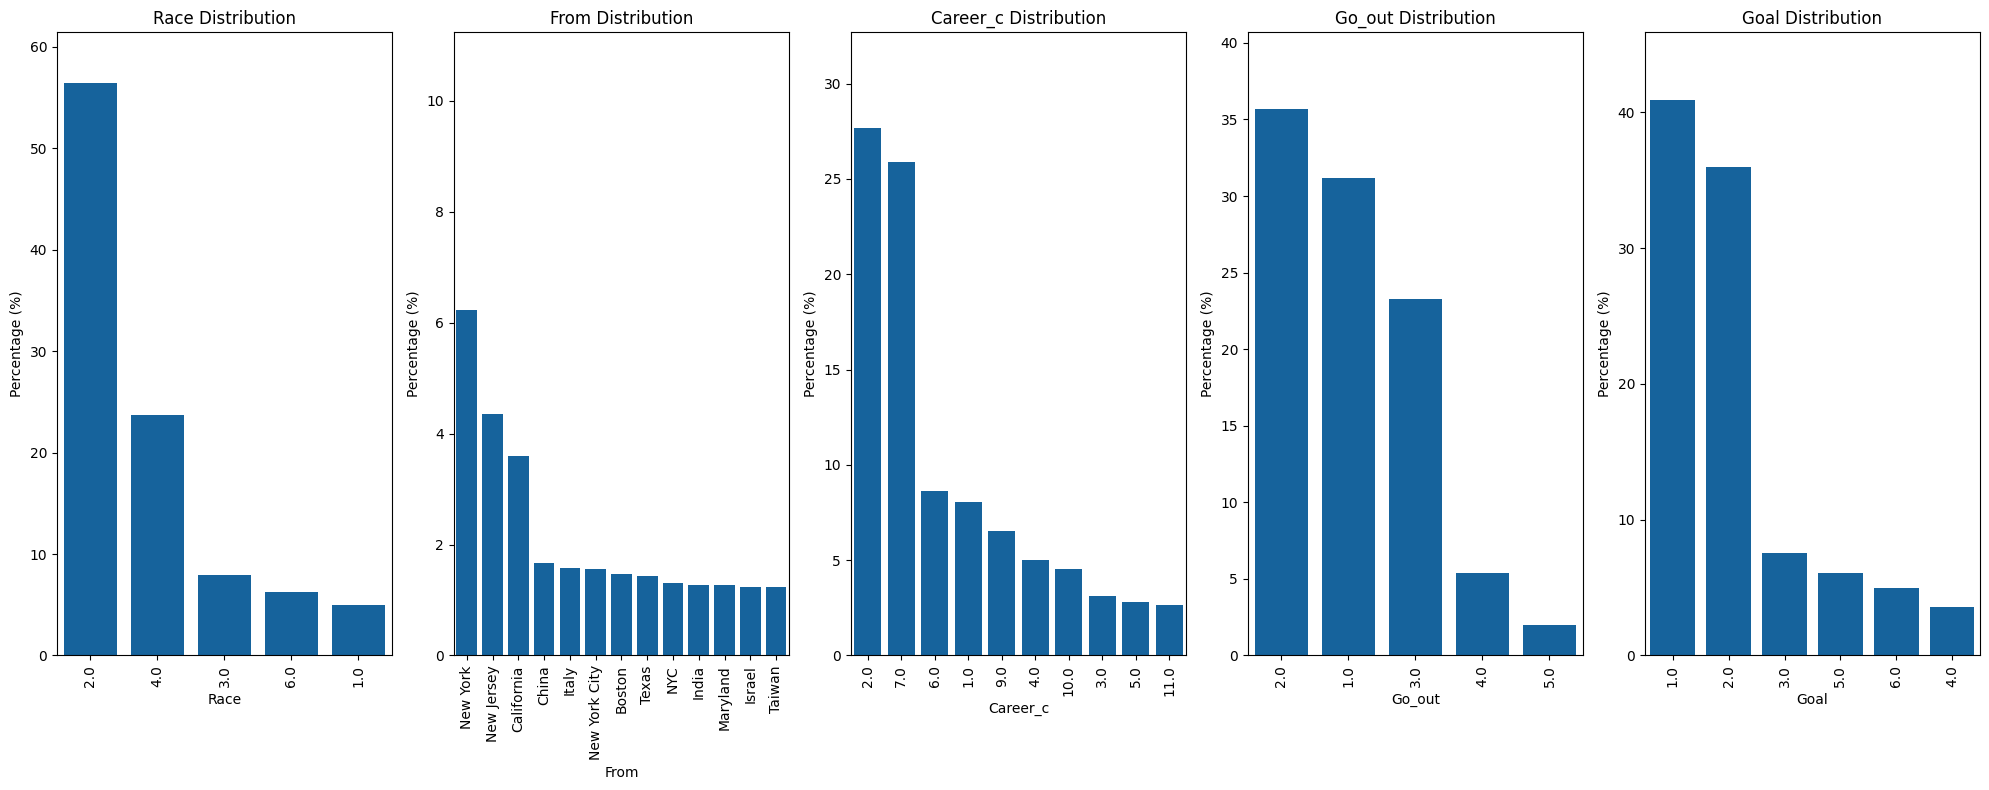

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

properties = ['race','from', 'career_c', 'go_out', 'goal']

# Calculate total number of rows for the subplot
total = tinder.shape[0]

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, len(properties), figsize=(20, 8))

# Loop through each property to plot in a subplot
for i, prop in enumerate(properties):
    # Calculate counts and filtered values for the current property
    counts = tinder[prop].value_counts().sort_values(ascending=False)
    filtered_values = counts[counts > 100] / total * 100
    filtered_df = pd.DataFrame({'value_counts': filtered_values})

    # Create a barplot for the current property in the respective subplot
    sns.barplot(data=filtered_df, x=filtered_df.index, y='value_counts', order=filtered_df.index, color="#0066b2", ax=axes[i])
    axes[i].set_title(f"{prop.capitalize()} Distribution")
    axes[i].set_xlabel(prop.capitalize())
    axes[i].set_ylabel("Percentage (%)")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylim(0, filtered_df['value_counts'].max() + 5)  # Adjust y-axis limit for better visualization

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("other properties distribution.png", dpi=300)
plt.show()


- More of 50% of the participants are Caucasian American, coming from New York, New Jersey and California
- 27% of the participants careers are mainly Academic/Research, 25% are involved in Finances/Business and 9% in Creative arts.
- 35% participants say to go on dates twice a week, 30% several times a week and 24% once a week.
- The main goals of the participants taking part of this"experiment" are 40% have a fun night out, 35% answered to meet new people while less than 10% are looking for a serious relationship.

C:\Users\CGC\AppData\Local\Temp\ipykernel_2176\3539336687.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=14, rotation=90)
C:\Users\CGC\AppData\Local\Temp\ipykernel_2176\3539336687.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
C:\Users\CGC\AppData\Local\Temp\ipykernel_2176\3539336687.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=14, rotation=90)
C:\Users\CGC\AppData\Local\Temp\ipykernel_2176\3539336687.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

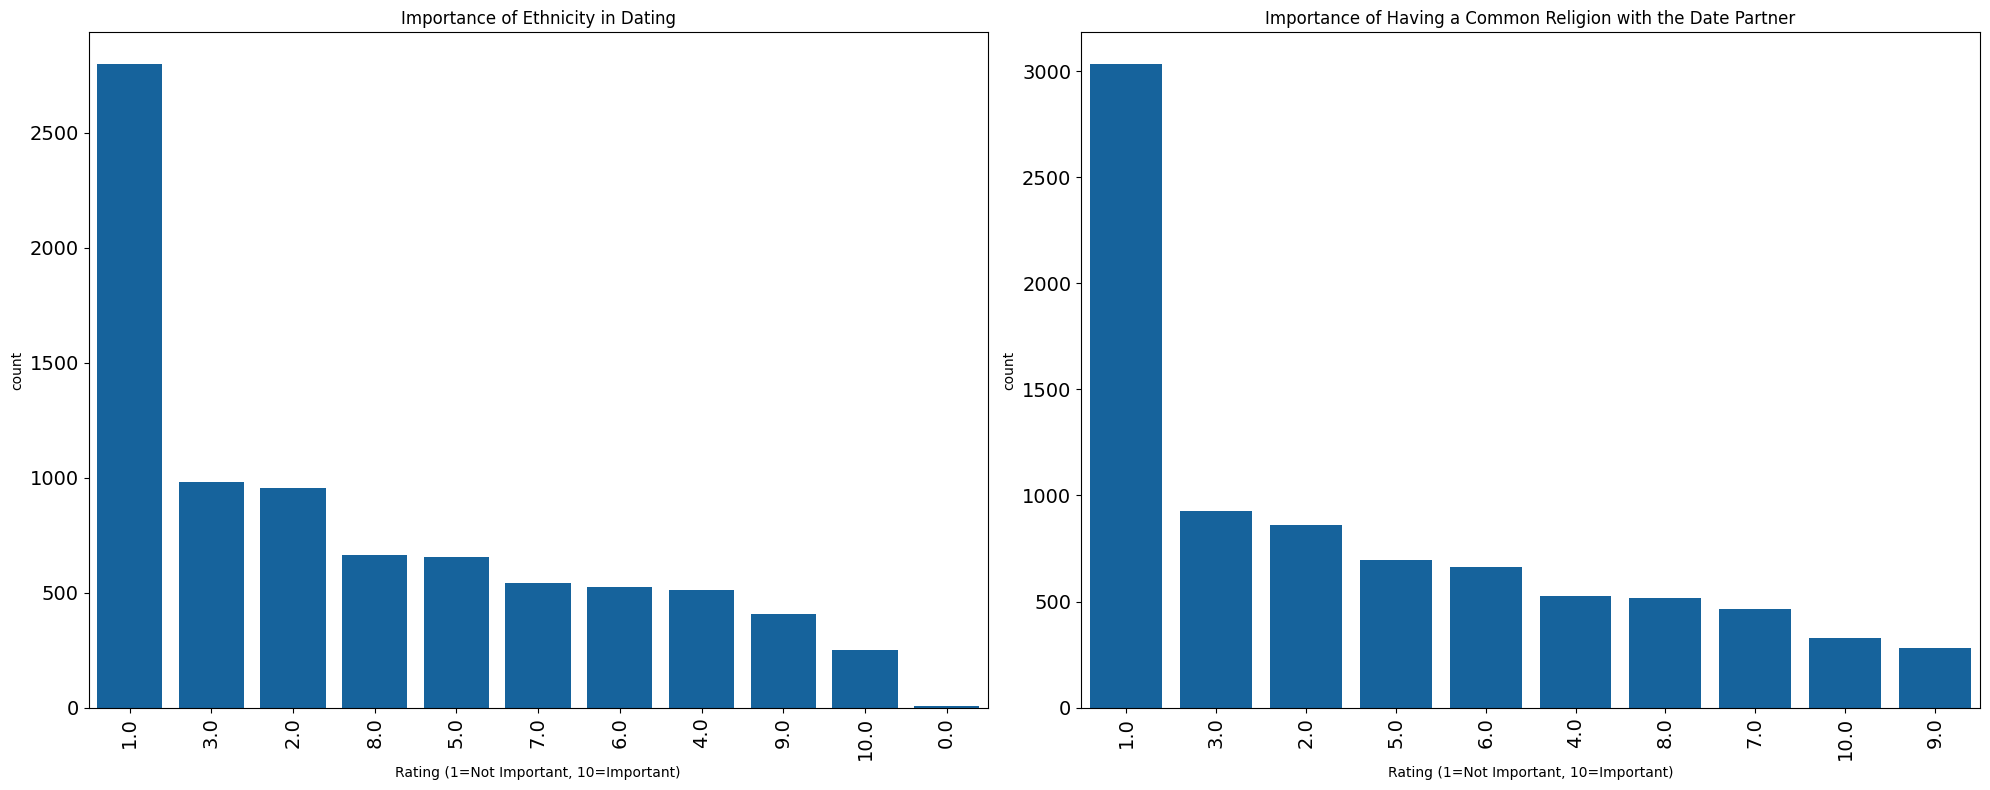

In [35]:
sorted_values_imprace = tinder['imprace'].value_counts().sort_values(ascending=False)
sorted_values_imprelig = tinder['imprelig'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Plot for importance of ethnicity
sns.countplot(data=tinder, x="imprace", order=sorted_values_imprace.index, color="#0066b2", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=14, rotation=90)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
axes[0].set_title("Importance of Ethnicity in Dating")
axes[0].set_xlabel('Rating (1=Not Important, 10=Important)')

# Plot for importance of religion
sns.countplot(data=tinder, x="imprelig", order=sorted_values_imprelig.index, color="#0066b2", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=14, rotation=90)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)
axes[1].set_title("Importance of Having a Common Religion with the Date Partner")
axes[1].set_xlabel('Rating (1=Not Important, 10=Important)')
plt.tight_layout()
plt.savefig("etchnicity and religion.png", dpi=300)
plt.show()

- According to the participants opinion it is important to belong to the same ethnicity group and religion.

# Which are the participants interests?

Highest count for tvsports: 1522 with item 1.0
Highest count for exercise: 1358 with item 8.0
Highest count for dining: 1924 with item 8.0
Highest count for museums: 1801 with item 7.0
Highest count for art: 1750 with item 8.0
Highest count for hiking: 1212 with item 8.0
Highest count for gaming: 1983 with item 1.0
Highest count for clubbing: 1402 with item 8.0
Highest count for reading: 2000 with item 9.0
Highest count for tv: 1381 with item 6.0
Highest count for theater: 1618 with item 7.0
Highest count for movies: 2021 with item 8.0
Highest count for concerts: 1531 with item 7.0
Highest count for music: 1789 with item 10.0
Highest count for shopping: 1198 with item 7.0
Highest count for yoga: 1549 with item 1.0


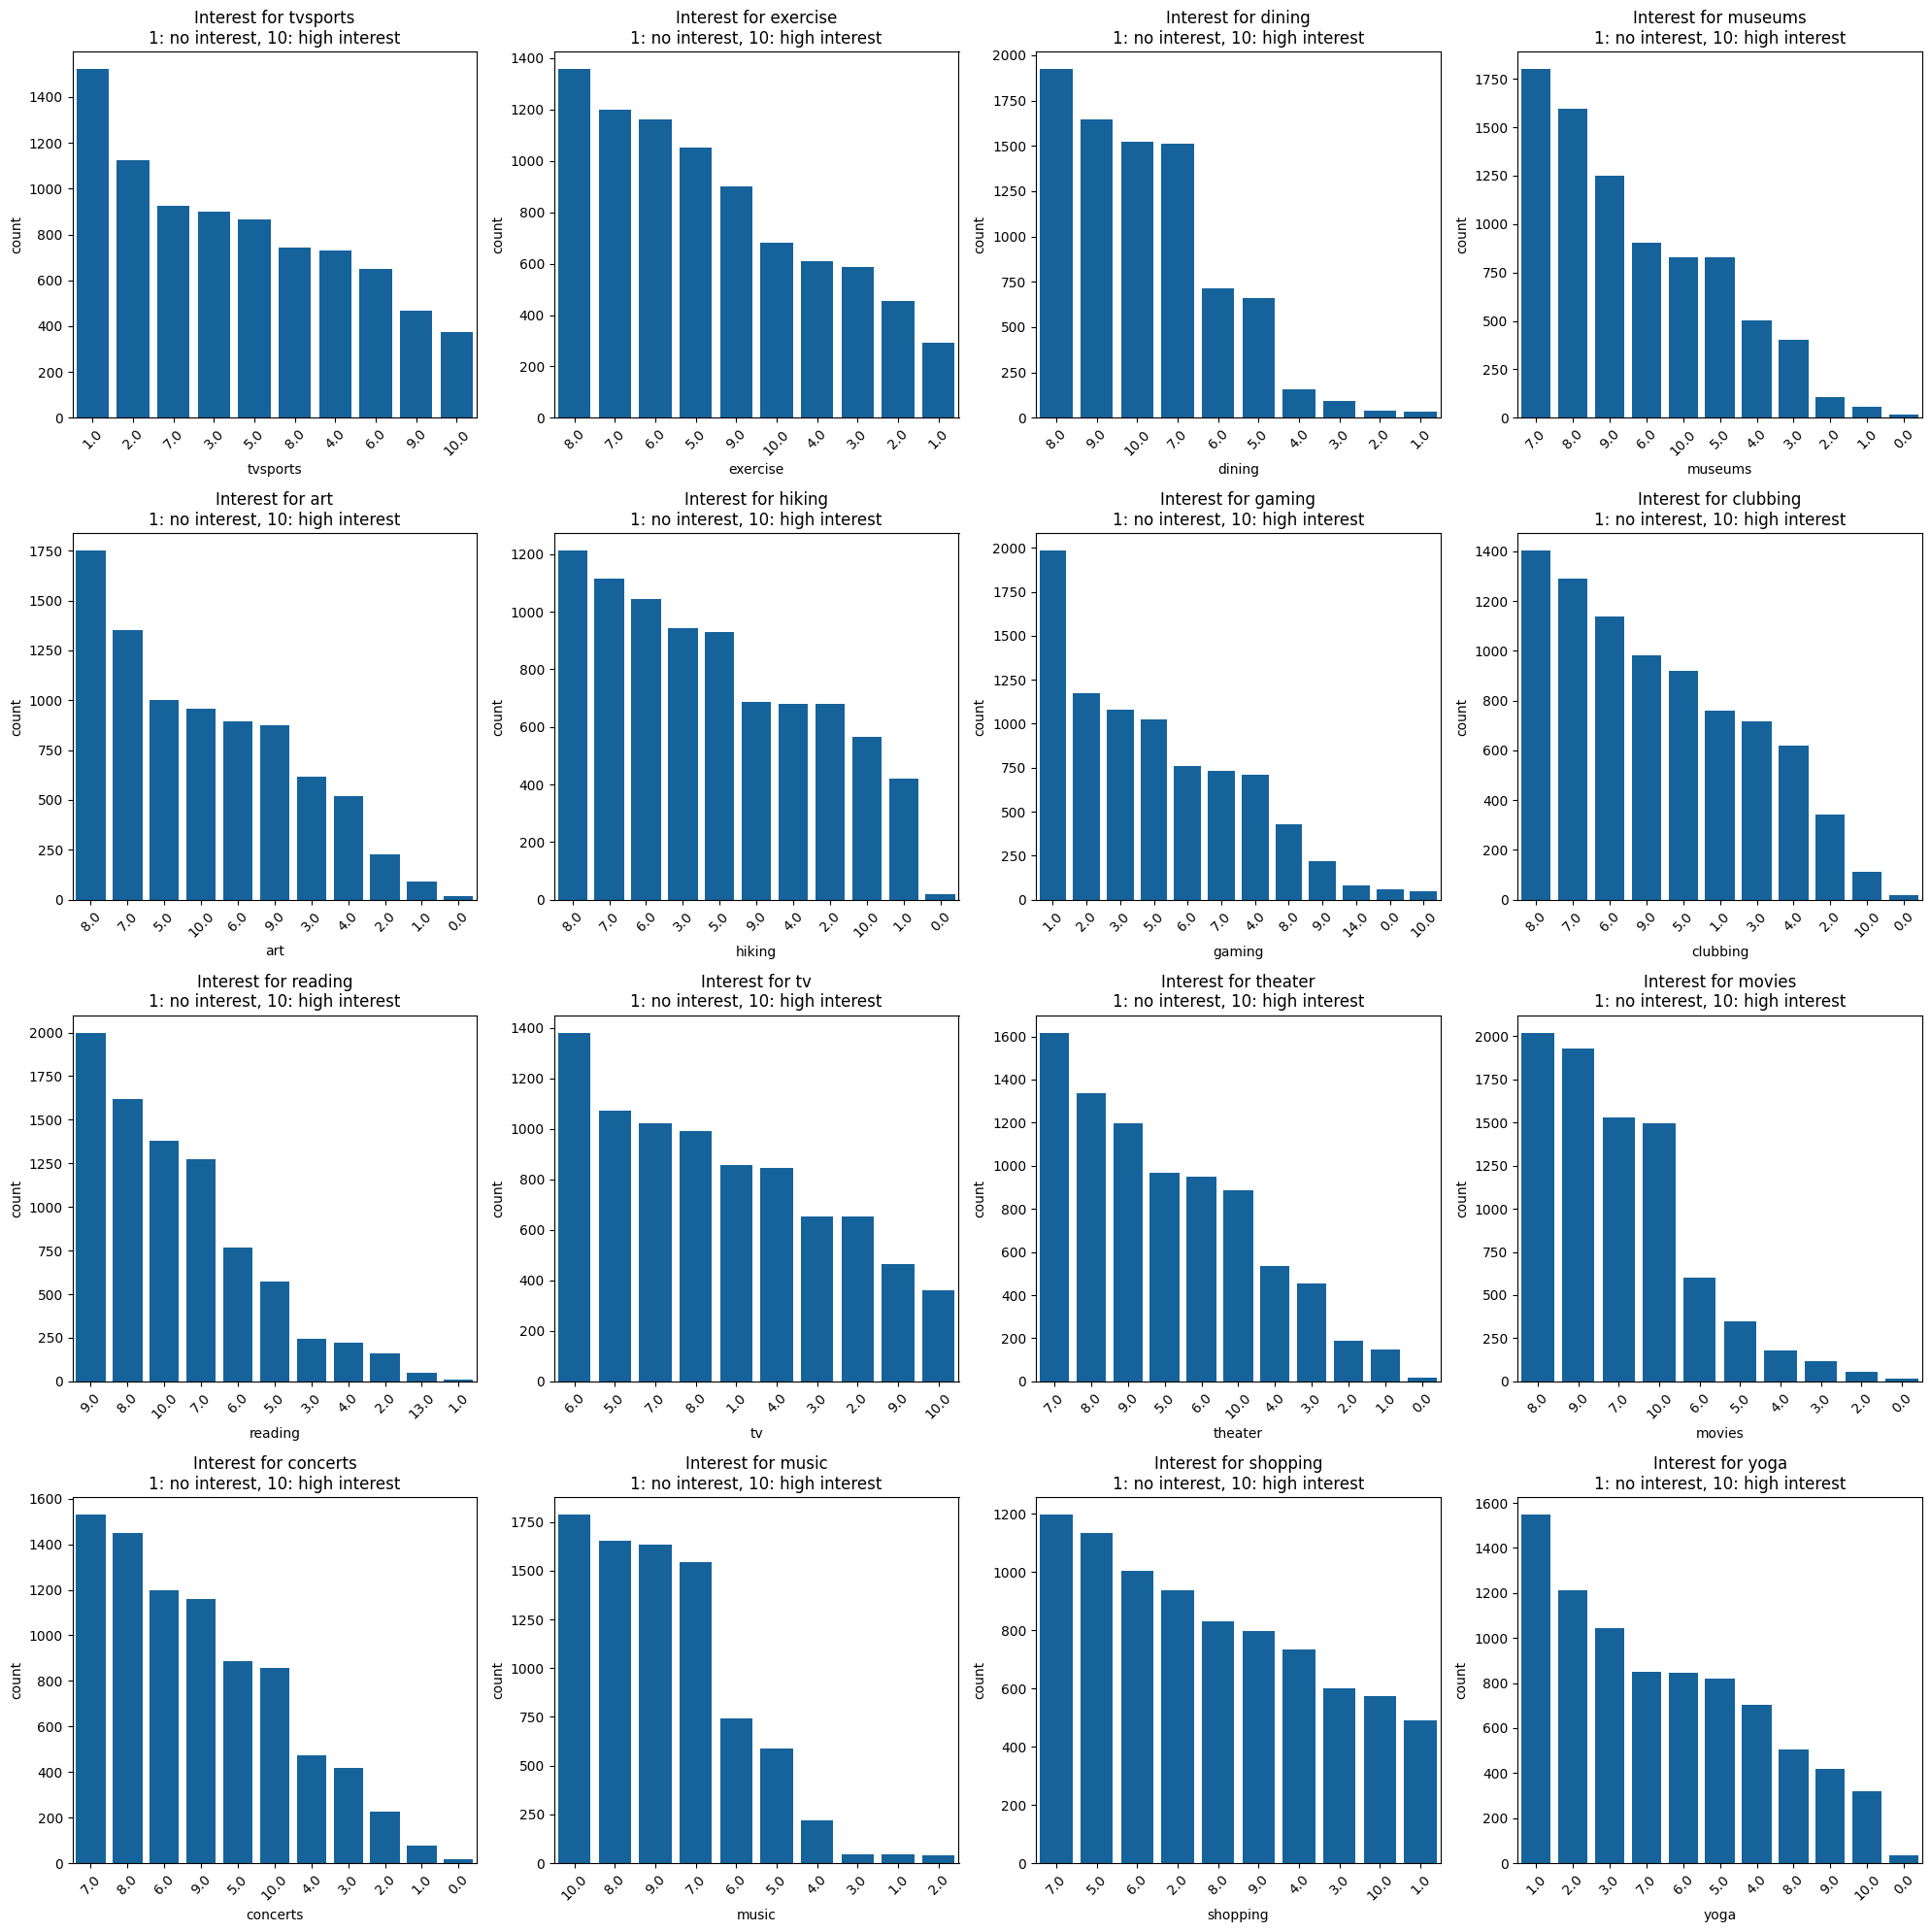

In [37]:
# Initialize the highest_counts dictionary
highest_counts = {}

activities = ["tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", 
              "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

# Set the figure size outside the loop to create a single figure
plt.figure(figsize=(20, 20))

for index, activity in enumerate(activities, start=1):
    plt.subplot(4, 4, index)
    sorted_values2 = tinder[activity].value_counts().sort_values(ascending=False)
    highest_counts[activity] = {'value': sorted_values2.iloc[0], 'item': sorted_values2.index[0]}
    plt.title(f"Interest for {activity}\n1: no interest, 10: high interest")
    sns.countplot(data=tinder, x=activity, order=sorted_values2.index, color="#0066b2")
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()

# Print highest counts for each activity
for activity, data in highest_counts.items():
    print(f"Highest count for {activity}: {data['value']} with item {data['item']}")

plt.savefig("rank of the activities interesets.png", dpi=300)
plt.show()

C:\Users\CGC\AppData\Local\Temp\ipykernel_2176\1322484956.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='activity', y='highest_item', order=df['activity'], palette='viridis')


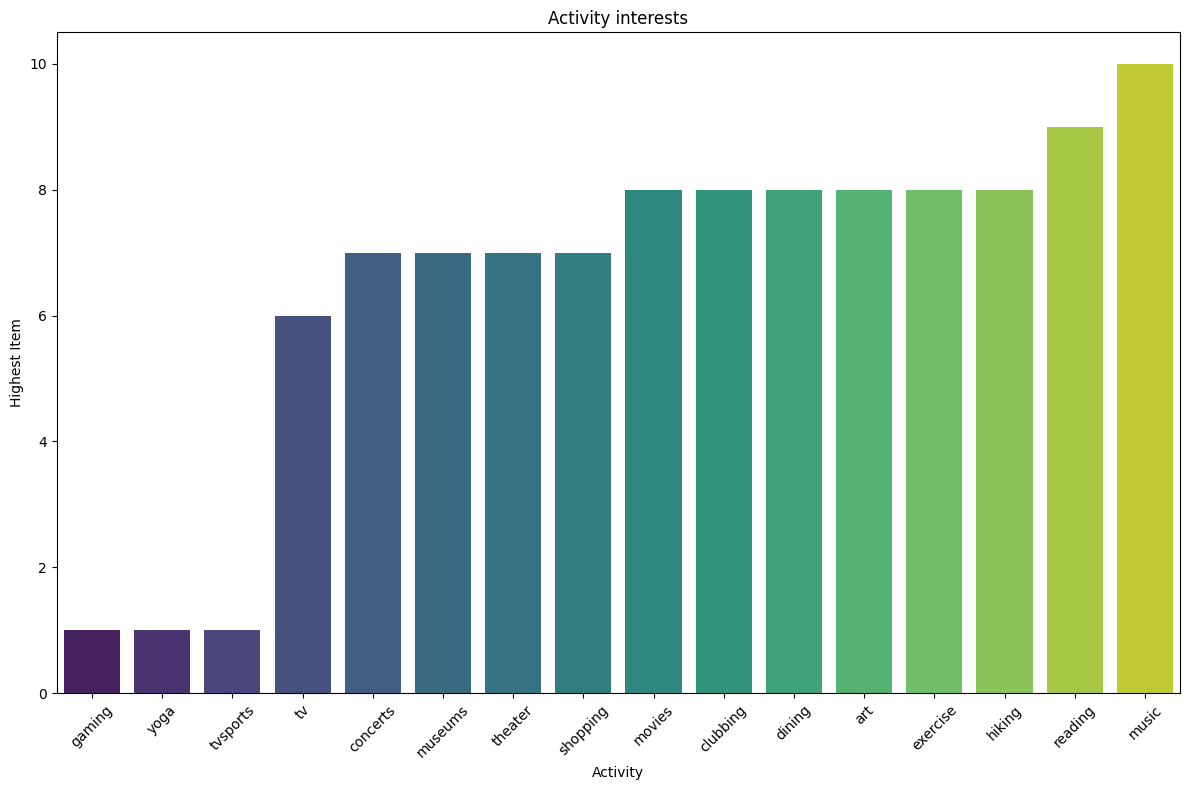

In [38]:
data = {
    'activity': ['movies', 'reading', 'gaming', 'dining', 'museums', 'music', 'art', 'theater', 'yoga', 'concerts', 'tvsports', 'clubbing', 'tv', 'exercise', 'hiking', 'shopping'],
    'count': [2021.0, 2000.0, 1983.0, 1924.0, 1801.0, 1789.0, 1750.0, 1618.0, 1549.0, 1531.0, 1522.0, 1402.0, 1381.0, 1358.0, 1212.0, 1198.0],
    'highest_item': [8.0, 9.0, 1.0, 8.0, 7.0, 10.0, 8.0, 7.0, 1.0, 7.0, 1.0, 8.0, 6.0, 8.0, 8.0, 7.0]}

df = pd.DataFrame(data)
df = df.sort_values(by='highest_item', ascending=True)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='activity', y='highest_item', order=df['activity'], palette='viridis')
plt.title('Activity interests')
plt.xlabel('Activity')
plt.ylabel('Highest Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Activity interests.png", dpi=300)
plt.show()

- Music and reading are the most important activities participants followed by hiking, exercise, clubbing, art, dinning and movies.  
- Gaming,yoga and tv are the least interesting for the participants.

# How important do people think attractiveness is in potential mate selection vs. its real impact?

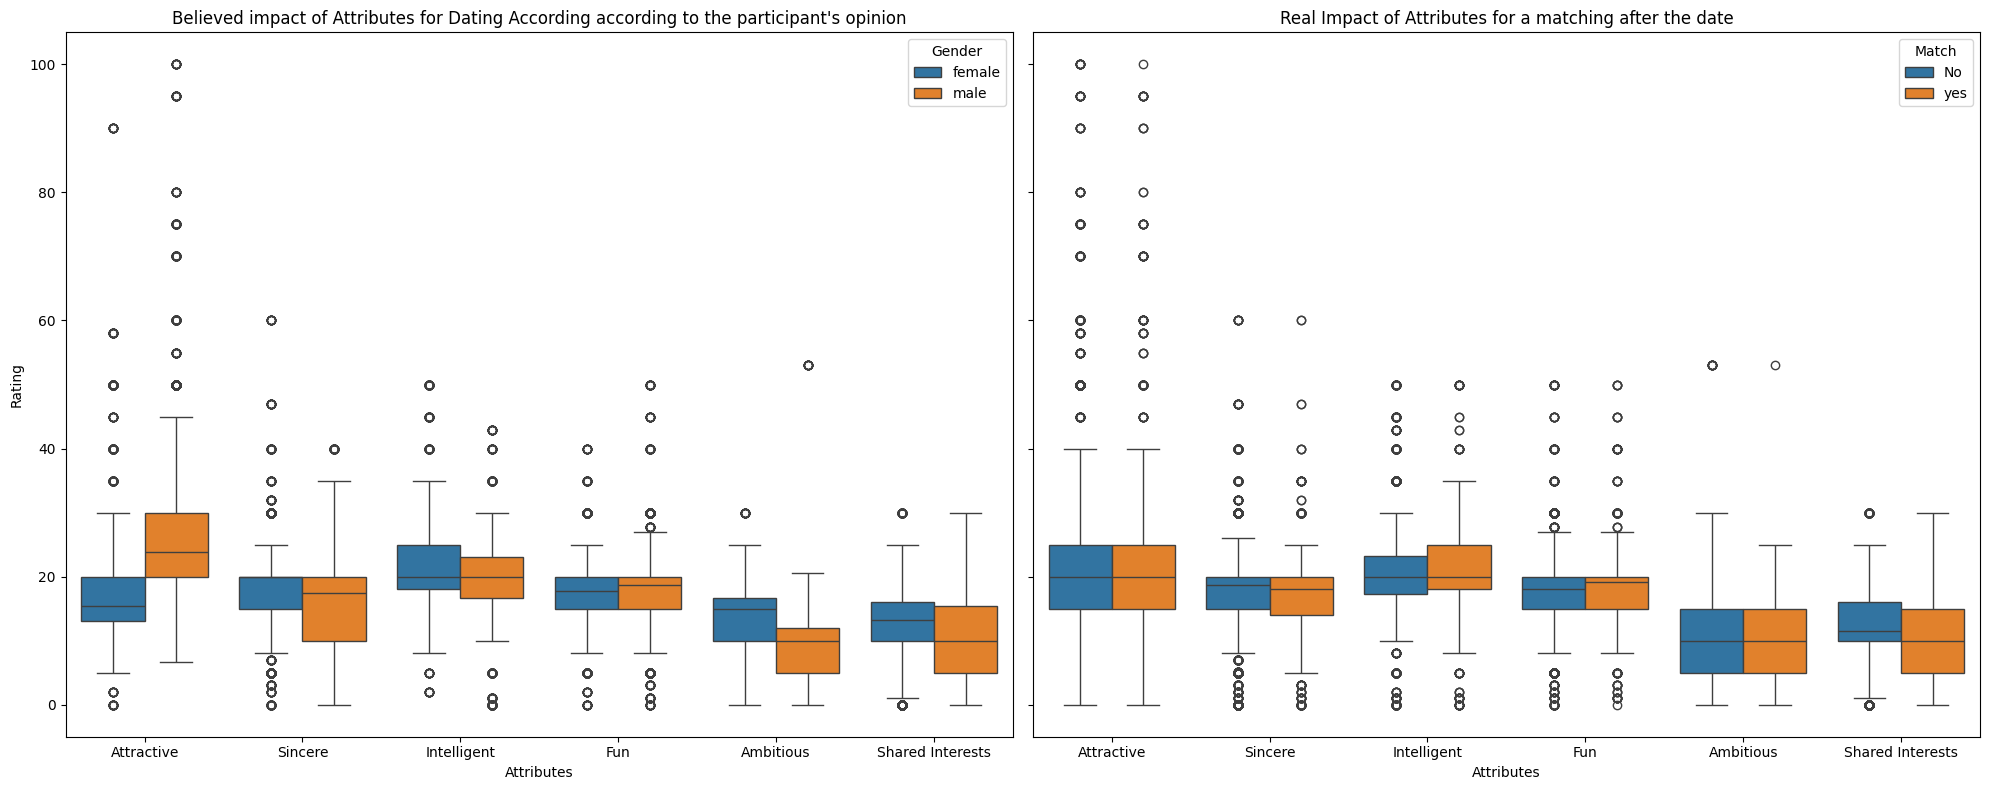

In [27]:
# Melt the DataFrame to long format
tinder_melted = pd.melt(tinder, 
                        id_vars=['gender', 'match', 'round', 'wave', 'samerace'], 
                        value_vars=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'],
                        var_name='variable',
                        value_name='value')

# Rename the 'variable' column values for better clarity
tinder_melted['variable'] = tinder_melted['variable'].replace({
    "attr1_1": 'Attractive', 
    "sinc1_1": 'Sincere', 
    "intel1_1": 'Intelligent', 
    "fun1_1": 'Fun', 
    "amb1_1": 'Ambitious', 
    "shar1_1": 'Shared Interests'})
tinder_melted['gender'] = tinder_melted['gender'].replace({0:'female', 1:'male'})
tinder_melted['match'] = tinder_melted['match'].replace({0:'no', 1:'yes'})

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
# Plotting the predicted impact of attributes for dating according to gender
sns.boxplot(data=tinder_melted, x="variable", y="value", hue="gender", ax=axes[0])
axes[0].set_title("Believed impact of Attributes for Dating According according to the participant's opinion")
axes[0].set_xlabel('Attributes')
axes[0].set_ylabel('Rating')
axes[0].legend(title='Gender', loc='upper right')

 # Plotting the real impact of attributes for dating
sns.boxplot(data=tinder_melted, x="variable", y="value", hue="match", ax=axes[1])
axes[1].set_title("Real Impact of Attributes for a matching after the date")
axes[1].set_xlabel('Attributes')
axes[1].set_ylabel('Rating')
axes[1].legend(title='Match', loc='upper right')

# Adjust layout
plt.tight_layout()
plt.savefig("believed and real impact of the attributes.png", dpi=300)
plt.show()

- The most important traits that men and women look in a partner are attractiveness, sincerity, intelligence and fun.
- Men are more interested in attractiveness than women. 
- Independently to the sex there is no difference in the perception of the capacity of the person to be or not to be a match.
- Bellow we will check if there is any difference between the 2 genders:
  * There is no differences in being selected or not either among male or female.
  * For women it is more important intelligence while for men is attractiveness and intelligence.

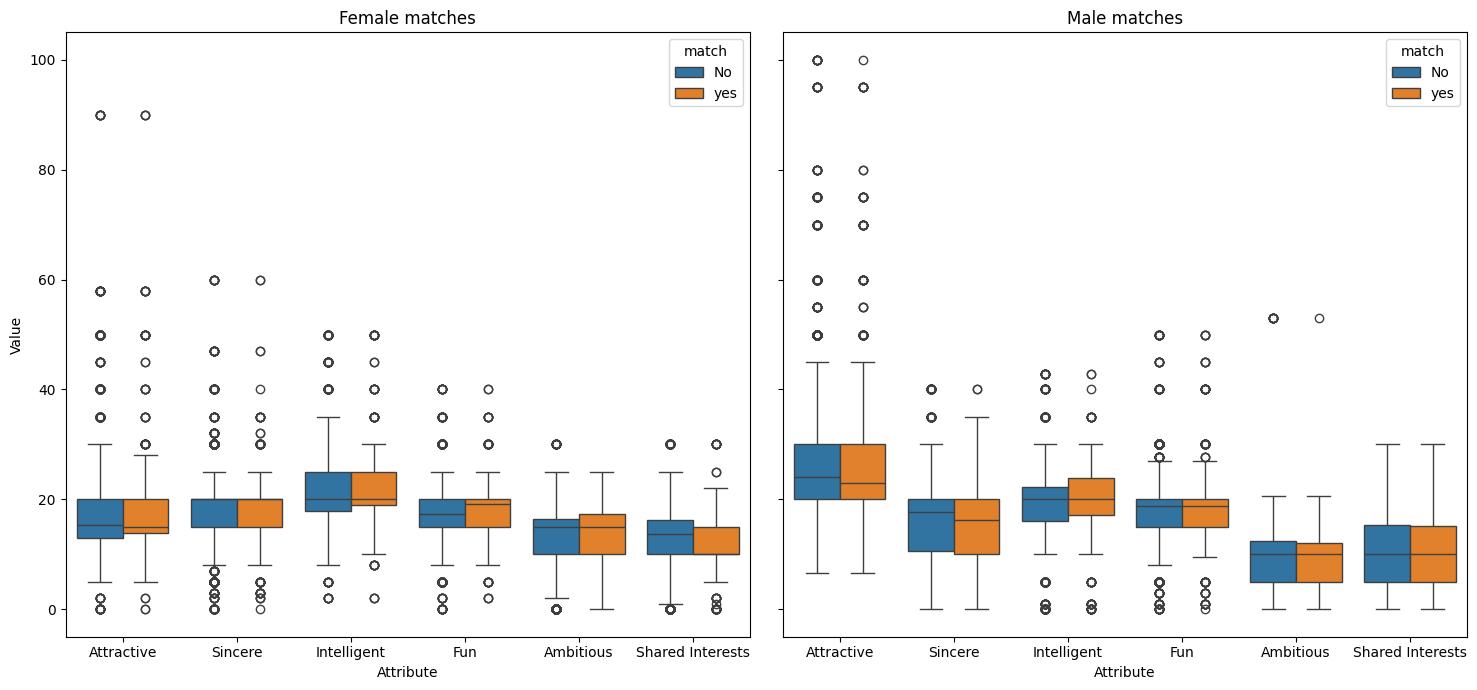

In [28]:
fem_opinion = tinder_melted[tinder_melted["gender"]== 'female']
male_opinion = tinder_melted[tinder_melted["gender"]=="male"]

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Boxplot for female opinions
sns.boxplot(data=fem_opinion, x="variable", y="value", hue="match", ax=axes[0])
axes[0].set_title('Female matches')
axes[0].set_xlabel('Attribute')
axes[0].set_ylabel('Value')

# Boxplot for male opinions
sns.boxplot(data=male_opinion, x="variable", y="value", hue="match", ax=axes[1])
axes[1].set_title('Male matches')
axes[1].set_xlabel('Attribute')
axes[1].set_ylabel('Value')

# Show the plot
plt.tight_layout()
plt.savefig("female and male matches.png", dpi=300)
plt.show()

# Are shared interests more important than a shared racial background?

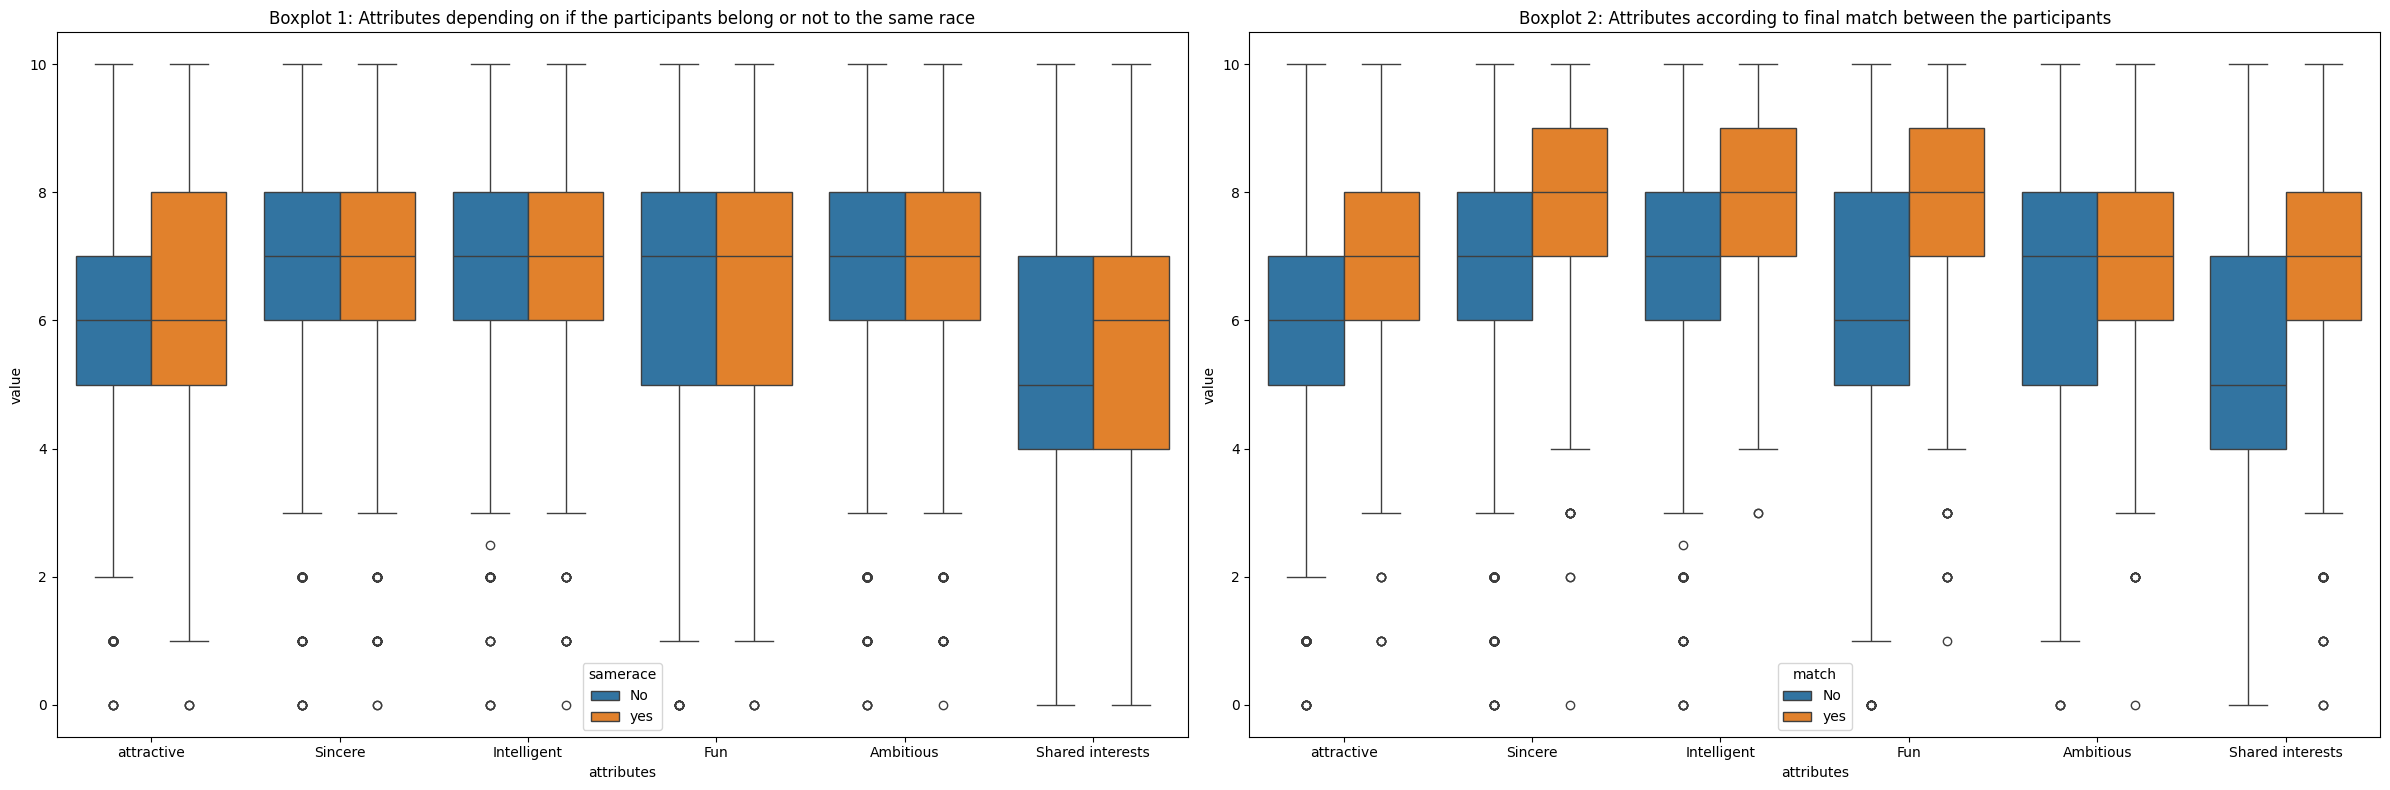

In [32]:
# Melt the DataFrame for the first boxplot
tinder_melted = pd.melt(tinder, 
                        id_vars=['gender', "match", "round", "wave", 'samerace', 'dec', "met", "prob", "like"],
                        value_vars=['attr', 'sinc', "intel", "fun", "amb", "shar", 'gender', "match", "round", "wave", "like"])
tinder_melted['attributes'] = tinder_melted['variable'].replace({"attr": 'attractive', "sinc": 'Sincere', "intel": 'Intelligent', 
                                                                "fun": 'Fun', "amb": 'Ambitious', "shar": 'Shared interests'})

# Melt the DataFrame for the second boxplot
tinder_melted2 = pd.melt(tinder, 
                         id_vars=['gender', "match", "round", "wave", 'samerace', 'dec', "met", "prob", "like"],
                         value_vars=['attr', 'sinc', "intel", "fun", "amb", "shar", 'gender', "match", "round", "wave", "like"])
tinder_melted2['attributes'] = tinder_melted2['variable'].replace({"attr": 'attractive', "sinc": 'Sincere', "intel": 'Intelligent', 
                                                                    "fun": 'Fun', "amb": 'Ambitious', "shar": 'Shared interests'})
tinder['match'] = tinder['match'].replace({1: 'yes', 0: 'No'}) 
tinder['met'] = tinder['met'].replace({1: 'yes', 2: 'No'}) 
tinder['samerace'] = tinder['samerace'].replace({1: 'yes', 0: 'No'}) 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.boxplot(data=tinder_melted, x="attributes", y="value", hue="samerace", ax=axes[0])
axes[0].set_title('Boxplot 1: Attributes depending on if the participants belong or not to the same race')

sns.boxplot(data=tinder_melted2, x="attributes", y="value", hue="match", ax=axes[1])
axes[1].set_title('Boxplot 2: Attributes according to final match between the participants')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("Interests or racial background.png", dpi=300)
plt.show()

- There is no difference in the grading of the features whether you are or not from the same race. Race is not an important trait to grade the date.
- This result, it is opposite to the believe that ethnicity and religion are important.
- To be a match, you have a higher attractiveness, sincerity, intelligence, fun and shared interests. However ambition is not a trait that is important to match.


👇 In the graph bellow 👇 you can see the trends:
- When the attributes are ranked high, the more the participant like the date.
- There are more persons with low values (bellow 7), there is less persons ranked with high values (above 7).

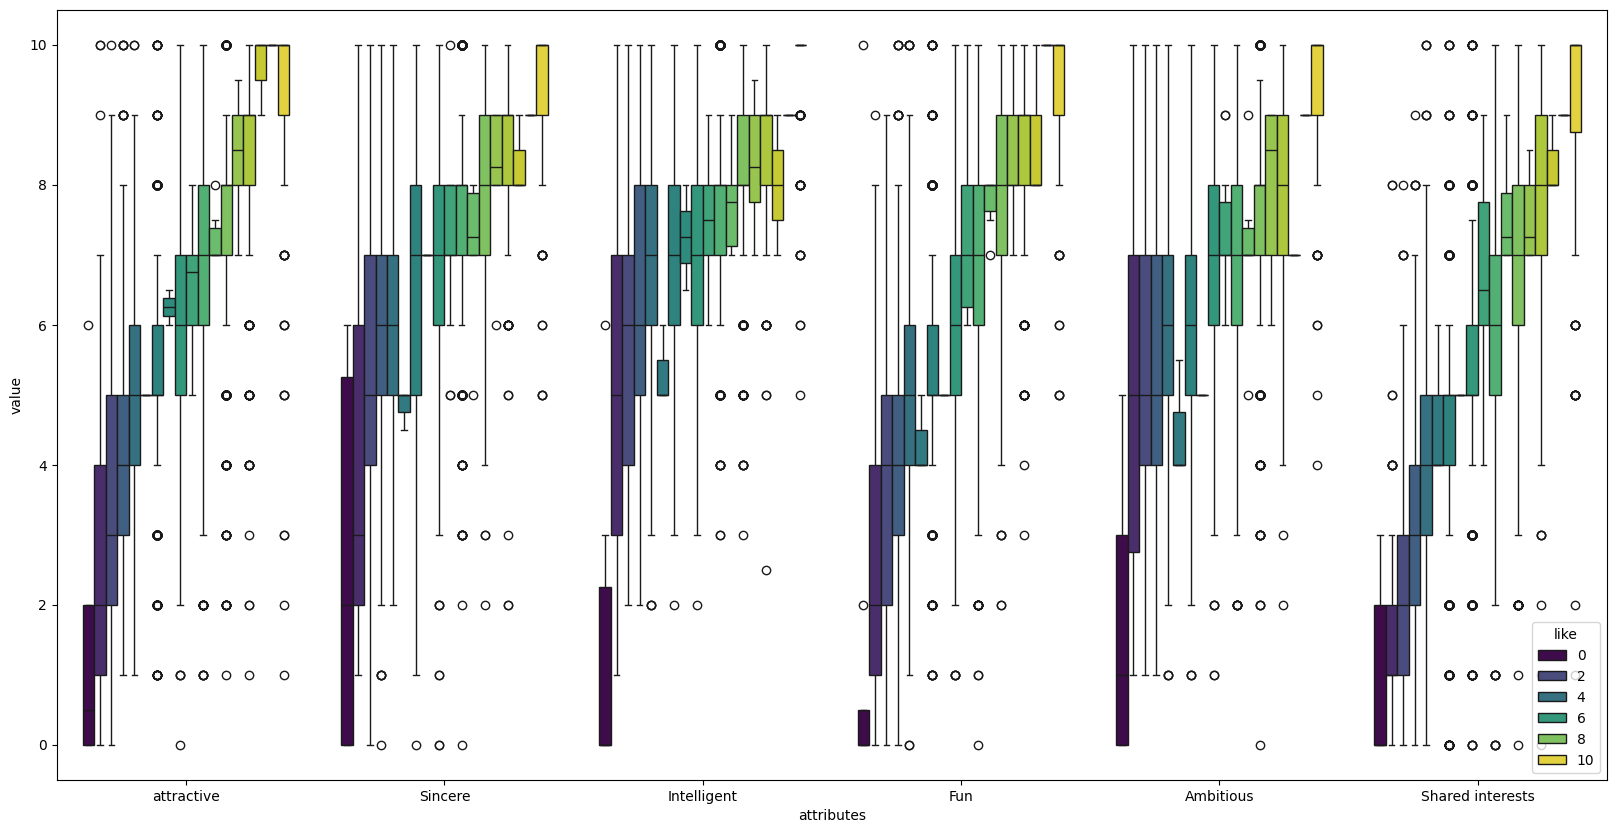

In [36]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=tinder_melted2 , x="attributes", y="value", hue="like", palette = "viridis")   
plt.savefig("attribute against quality of date.png", dpi=300)
plt.show()

# Can people accurately predict their own perceived value in the dating market?

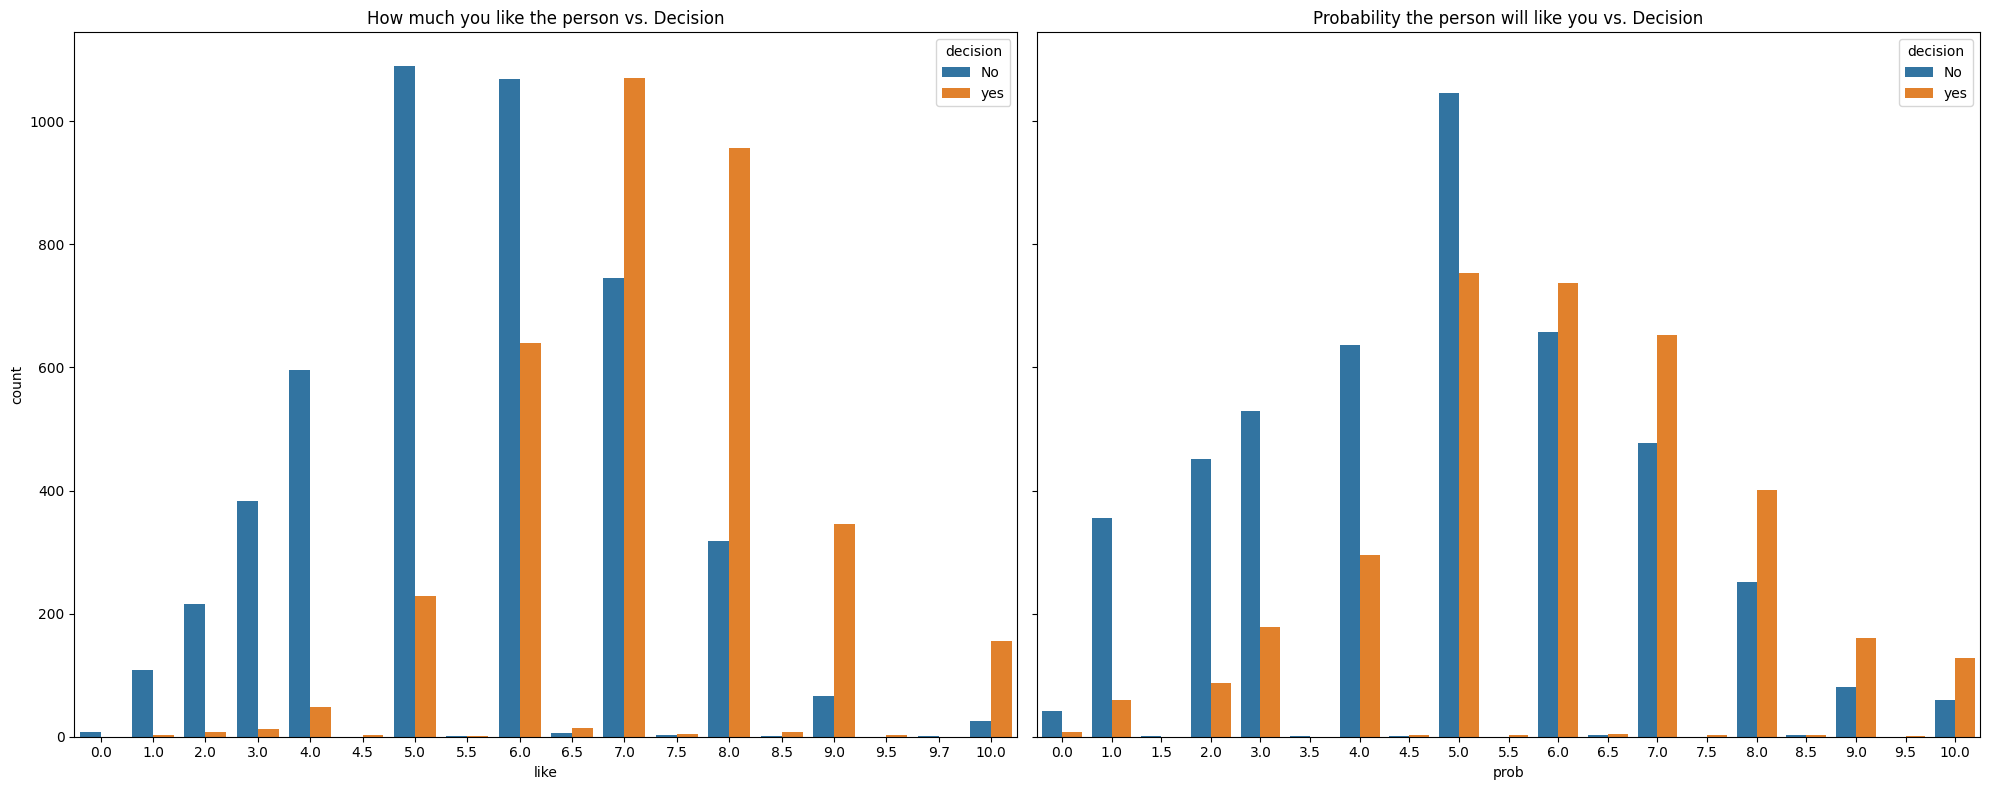

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
tinder['decision'] = tinder['dec'].replace({1: 'yes', 0: 'No'}) 

sns.countplot(data=tinder, x="like", hue='decision', ax=axes[0])
axes[0].set_title('How much you like the person vs. Decision')

sns.countplot(data=tinder, x="prob", hue='decision', ax=axes[1])
axes[1].set_title('Probability the person will like you vs. Decision')

plt.tight_layout()
plt.savefig("perception vs decision.png", dpi=300)
plt.show()
plt.show()

In [12]:
mode_like_yes = tinder[tinder['decision'] == 'yes']['like'].mode()
print(mode_like_yes)

mode_like_no = tinder[tinder['decision'] == 'No']['like'].mode()
print(mode_like_no)

0    7.0
Name: like, dtype: float64
0    5.0
Name: like, dtype: float64


In [13]:
mode_prob_yes = tinder[tinder['decision'] == 'yes']['prob'].mode()
print(mode_prob_yes)

mode_prob_no = tinder[tinder['decision'] == 'No']['prob'].mode()
print(mode_prob_no)

0    5.0
Name: prob, dtype: float64
0    5.0
Name: prob, dtype: float64


- People which were ranked with a grade of 7-8-9-10 according to how much they like the date, have a final decision of YES to go to next round.
  
- When people ranked with a 5-6, most decided NOT to meet in the next round.

- People have a lower perception of themselfs, the scores were smaller when participants have to rank themselves.

- Participants underestimate their probability to be chosen. 